#비지도 학습
오토 인코더

변이형 오토 인코더, 잡음 제거 오토 인코더

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

In [0]:
# 하이퍼 파라미터 분리
learning_rate = 0.01
training_epoch = 20
batch_size = 100
n_hidden = 256
n_input = 28 * 28

In [0]:
# 비지도 학습이므로 Y값이 존재 하지 않는다.
X = tf.placeholder(tf.float32, [None, n_input])

인코더와 디코더 제작

In [0]:
#인코더
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))

encoder = tf.nn.sigmoid(
    tf.add(tf.matmul(X, W_encode), b_encode)
)

In [0]:
#디코더
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))

decoder = tf.nn.sigmoid(
    tf.add(tf.matmul(encoder, W_decode), b_decode)
)

입력층(784) - 은닉층(256) - 출력층(784) 제작

In [0]:
# 비용함수 : 거리함수로 계산
cost = tf.reduce_mean(tf.pow(X - decoder, 2))

In [11]:
# RMSPropOptimizer
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
init = tf.global_variables_initializer()
sess= tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(training_epoch):
  total_cost = 0

  for i in range(total_batch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    _,cost_val = sess.run([optimizer, cost], feed_dict = {X: batch_xs})
    total_cost += cost_val

  print('Epoch : ', '%04d' % (epoch + 1),
        'Avg. cost : ', '{:.4f}'.format(total_cost / total_batch))
print('---최적화 완료---')

Epoch :  0001 Avg. cost :  0.1961
Epoch :  0002 Avg. cost :  0.0554
Epoch :  0003 Avg. cost :  0.0476
Epoch :  0004 Avg. cost :  0.0430
Epoch :  0005 Avg. cost :  0.0395
Epoch :  0006 Avg. cost :  0.0382
Epoch :  0007 Avg. cost :  0.0355
Epoch :  0008 Avg. cost :  0.0345
Epoch :  0009 Avg. cost :  0.0323
Epoch :  0010 Avg. cost :  0.0312
Epoch :  0011 Avg. cost :  0.0308
Epoch :  0012 Avg. cost :  0.0304
Epoch :  0013 Avg. cost :  0.0299
Epoch :  0014 Avg. cost :  0.0282
Epoch :  0015 Avg. cost :  0.0275
Epoch :  0016 Avg. cost :  0.0262
Epoch :  0017 Avg. cost :  0.0258
Epoch :  0018 Avg. cost :  0.0255
Epoch :  0019 Avg. cost :  0.0253
Epoch :  0020 Avg. cost :  0.0252
---최적화 완료---


In [0]:
sample_size = 10
samples = sess.run(decoder, feed_dict = {X: mnist.test.images[:sample_size]})

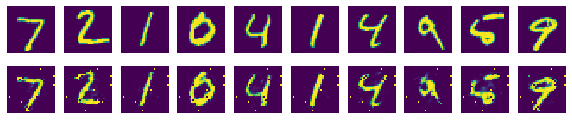

In [15]:
fig, ax = plt.subplots(2, sample_size, figsize = (sample_size, 2))

for i in range(sample_size):
  ax[0][i].set_axis_off()
  ax[1][i].set_axis_off()
  ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
  ax[1][i].imshow(np.reshape(samples[i], (28, 28)))

plt.show()